## OpenEarhMap demo
### FasterSeg lightweight model 

In [1]:
import torch
from thop import profile

from config import config
from oem_lightweight.evaluator import SegEvaluator
from oem_lightweight.utils import prepare_data
from oem_lightweight.model import fasterseg

### Pretrained model
Download the model [architecture](https://drive.google.com/file/d/12oDzi-sDnD_Y4CBONei_g2SZBMZ6cx-2/view?usp=sharing) and [pretrained weights](https://drive.google.com/file/d/1BgCu1Rz2PvTPJzI_J97hNkr4HvlvI-pE/view?usp=sharing) and place them in "models/FasterSeg/"


In [2]:
# load SparseMask model
arch='models/FasterSeg/arch_1.pt'
weights='models/FasterSeg/weights1.pt'
model = fasterseg(arch=arch, weights=weights)

# check number of parameters and flops
flop, params = profile(model["model"], inputs=(torch.randn(1, 3, 1024, 1024),), verbose=False)
print("Params = %fMB, FLOP = %fGB" % (params / 1e6, flop / 1e9))

Params = 3.465192MB, FLOP = 15.425864GB


### Demo 1

In [3]:
# get demo data files: image and label files
image = "demo_data/images/houston_16.tif"
label = "demo_data/labels/houston_16.tif"

# prepare the data
data = prepare_data(img_file=image, label_file=label)

In [4]:
# init evaluator
evaluator = SegEvaluator(config, data=data, network=model)

# preform evaluation
result = evaluator.evaluate()
print(result)

[[3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 ...
 [4 4 4 ... 2 2 2]
 [4 4 4 ... 2 2 2]
 [4 4 4 ... 2 2 2]]


In [5]:
# commute IoU
evaluator.compute_metric(result)

Class IoU Results
------------------------------
1 Bareland      	nan%
2 Rangeland     	50.67%
3 Developed space	43.95%
4 Road          	66.96%
5 Tree          	61.43%
6 Water         	77.74%
7 Agriculture land	0.00%
8 Buildings     	75.24%
------------------------------
mean_IoU        	53.71%


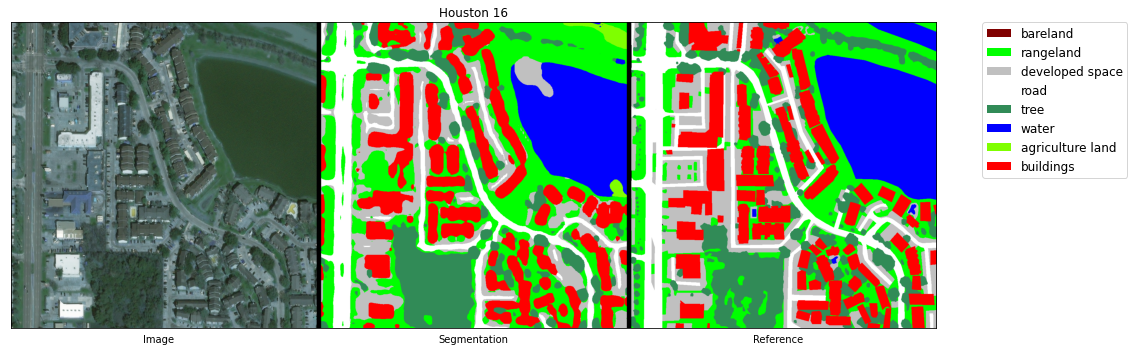

In [6]:
# plot and save image
evaluator.show_predicted_image(result, only_pred=False, save_img=False, save_dir=None)

### Demo 2

In [7]:
# get demo data files: image and label files
image = "demo_data/images/palu_8.tif"
label = "demo_data/labels/palu_8.tif"

# prepare the data
data = prepare_data(img_file=image, label_file=label)

In [8]:
# init evaluator
evaluator = SegEvaluator(config, data=data, network=model)

# preform evaluation
result = evaluator.evaluate()
print(result)

[[4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 1]
 ...
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]]


In [9]:
# commute IoU
evaluator.compute_metric(result)

Class IoU Results
------------------------------
1 Bareland      	nan%
2 Rangeland     	50.54%
3 Developed space	67.67%
4 Road          	56.14%
5 Tree          	70.48%
6 Water         	90.11%
7 Agriculture land	nan%
8 Buildings     	61.15%
------------------------------
mean_IoU        	66.01%


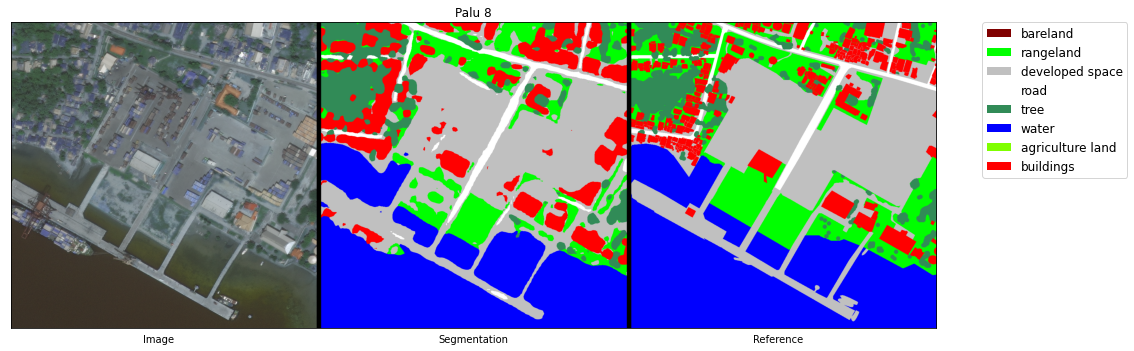

In [10]:
# plot and save image
evaluator.show_predicted_image(result, only_pred=False, save_img=False, save_dir=None)